# INTRODUCTION

# Preeti Sugumar - pxs190039
# Marini Durai Raju - mxd190034

### Dataset Link:https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Objective: Implement machine learning models to predict employee attrition

Attrition refers to the phenomenon of the employees leaving the company.  This is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company(Attrition). The dataset contains 1,470 rows and 35 columns with important attributes such as Department, Education, Hourly rate, Monthly Income etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [3]:
data = pd.read_csv('HR-Employee-Attrition.csv',index_col='EmployeeNumber')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94.0,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61.0,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92.0,2,1,Laboratory Technician,3,Single,NaN,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56.0,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40.0,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
print(data.isnull().sum())

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                  46
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome               23
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

On checking for missing values in the dataset, we find missing values in two attributes:Hourly Rate and Monthly Income.

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

Age                         0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  3.129252
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               1.564626
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
PerformanceRating           0.000000
RelationshipSatisfaction    0.000000
StandardHours               0.000000
StockOptionLevel            0.000000
T

The missing values for the dataset is about 5% which is solved by performing imputation as shown below.

In [7]:
data['HourlyRate'].fillna(int(data['HourlyRate'].mean()), inplace=True)
data['MonthlyIncome'].fillna(int(data['MonthlyIncome'].mean()), inplace=True)

In [8]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
print('The total number of rows:{} and columns:{}'.format(data.shape[0],data.shape[1]))

The total number of rows:1470 and columns:34


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.814966,2.729932,2.063946,2.728571,6539.867347,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,19.960575,0.711561,1.106940,1.102846,4690.058273,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,49.000000,2.000000,1.000000,2.000000,2956.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,65.000000,3.000000,2.000000,3.000000,5008.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8339.750000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
data[['DailyRate','HourlyRate','MonthlyRate','StandardHours']].describe()

,DailyRate,HourlyRate,MonthlyRate,StandardHours
count,1470.000000,1470.000000,1470.000000,1470.0
mean,802.485714,65.814966,14313.103401,80.0
std,403.509100,19.960575,7117.786044,0.0
min,102.000000,30.000000,2094.000000,80.0
25%,465.000000,49.000000,8047.000000,80.0
50%,802.000000,65.000000,14235.500000,80.0
75%,1157.000000,83.000000,20461.500000,80.0
max,1499.000000,100.000000,26999.000000,80.0


In [15]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

# Feature Tranformation

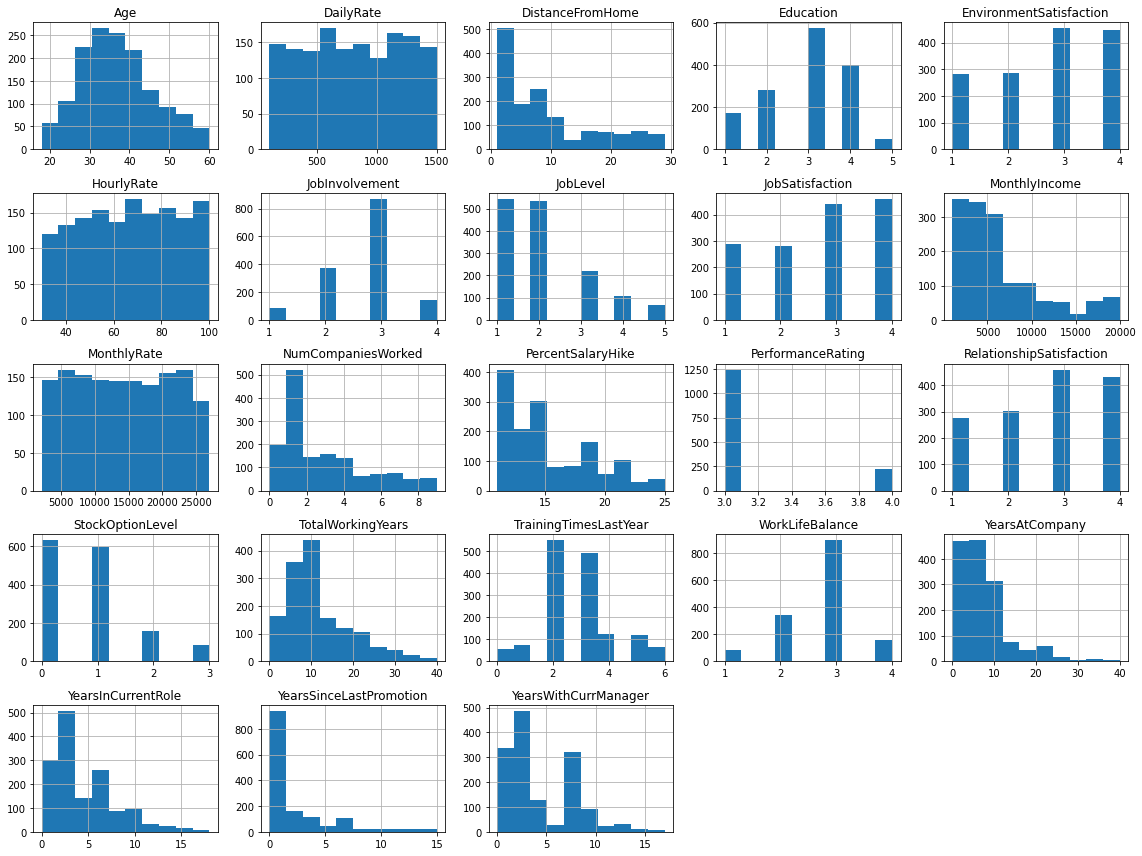

In [16]:
data.hist(figsize=(16,12))
plt.tight_layout()

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column. As we see from the distribution above, we can clearly observe a skewed ditribution which is transformed to normal distribution.

In [17]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        print(i,':',data[i].skew())

DistanceFromHome : 0.9581179956568269
JobLevel : 1.0254012829518246
MonthlyIncome : 1.3673493868245774
NumCompaniesWorked : 1.026471111968205
PerformanceRating : 1.921882702142603
StockOptionLevel : 0.9689803167738937
TotalWorkingYears : 1.1171718528128527
YearsAtCompany : 1.7645294543422085
YearsInCurrentRole : 0.9173631562908262
YearsSinceLastPromotion : 1.9842899833524859


In [18]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        data[i]=data[i].transform(lambda x:np.log1p(x))

In [19]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0:
        print(i,':',data[i].skew())

Age : 0.4132863018563338
JobLevel : 0.4481334349835919
MonthlyIncome : 0.26308389801077703
MonthlyRate : 0.018577807891132458
NumCompaniesWorked : 0.09289622460196824
PercentSalaryHike : 0.8211279755780908
PerformanceRating : 1.9218827021425997
StockOptionLevel : 0.27196254237149353
TrainingTimesLastYear : 0.5531241710537028
YearsSinceLastPromotion : 0.7188045525459852
YearsWithCurrManager : 0.8334509919918475


# Exploratory Data Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


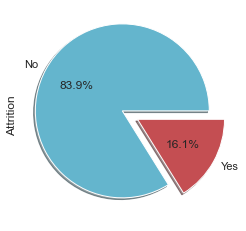

In [20]:
plt.figure(figsize=(14,4))
sns.set(style='whitegrid')
data['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

We have 32 features consisting of both categorical as well as the numerical features. Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.

Gender     Female  Male
Attrition              
No          34.08  49.8
Yes          5.92  10.2
Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


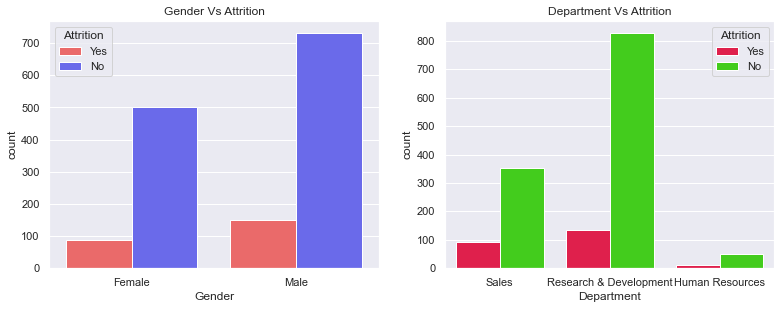

In [22]:
print(round(pd.crosstab(data['Attrition'],data['Gender'],normalize=True)*100,2))

plt.figure(figsize=(13,10))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot('Gender',hue='Attrition',data=data,palette='seismic_r')

sns.set(style="darkgrid")
plt.subplot(222)
plt.title('Department Vs Attrition')
sns.countplot(data['Department'],hue=data['Attrition'],palette='prism_r')


Male employees are more likely to leave the company than female employees.

There are three departments in the company. Research & Development Department has the most attrition in the company followed by Sales department and finally, Human Resources has the lowest attrition.


In [23]:
pd.crosstab([data['Attrition']],data['JobRole'],normalize=True)*100

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,8.299320,2.721088,13.401361,6.598639,9.183673,5.306122,16.666667,18.299320,3.401361
Yes,0.612245,0.816327,4.217687,0.340136,0.680272,0.136054,3.197279,3.877551,2.244898


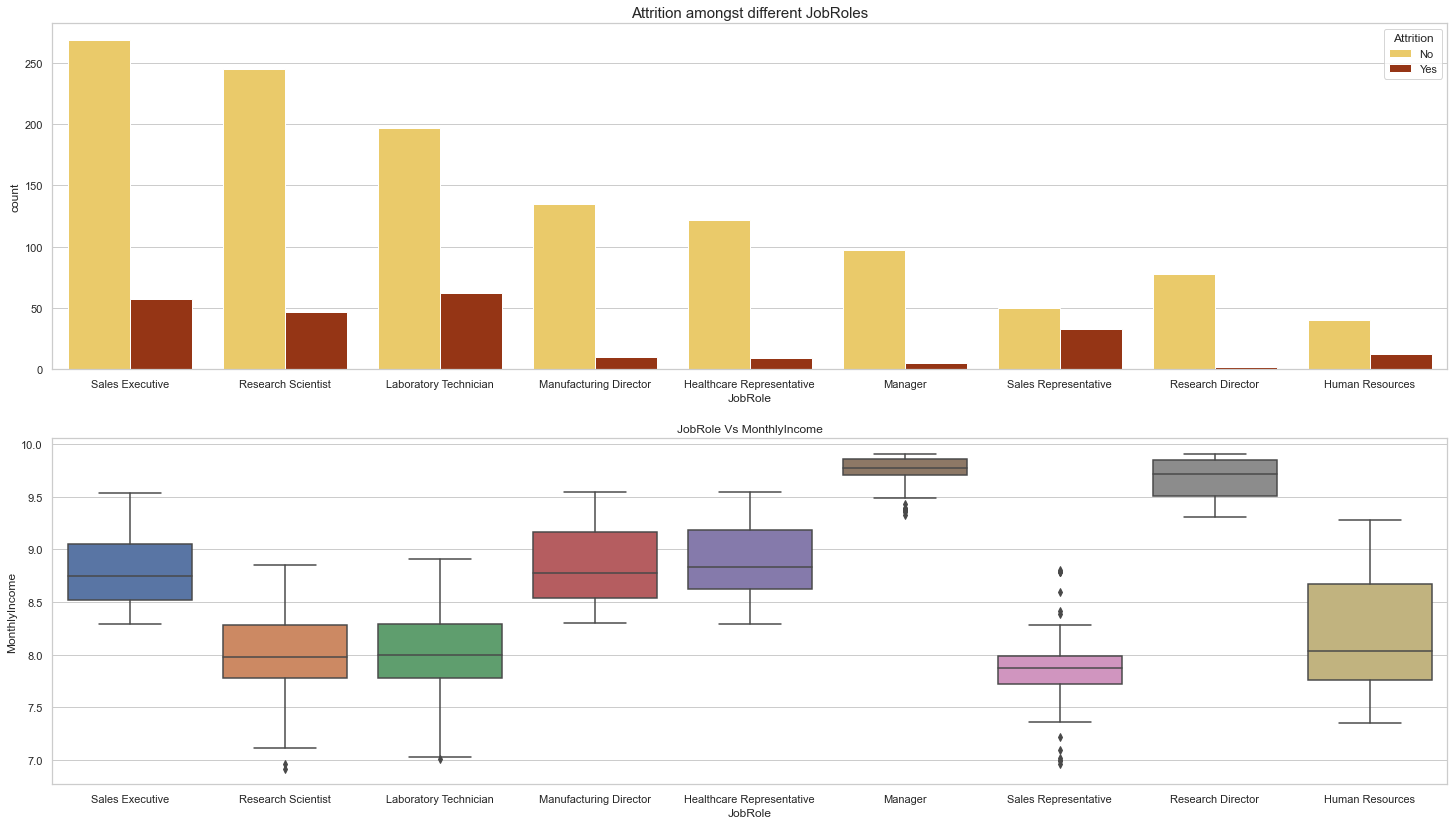

In [24]:
plt.figure(figsize=(25,14))
sns.set(style="whitegrid")

plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(data['JobRole'],palette='afmhot_r',hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)

plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(data['JobRole'],data['MonthlyIncome'])

Laboratory Technician job role has the most attrition number. Sales Executive and Research Scientist are following the Laboratory Technician in attrition throughout the company.

On the other hand, Research Director job role has the lowest attrition number.

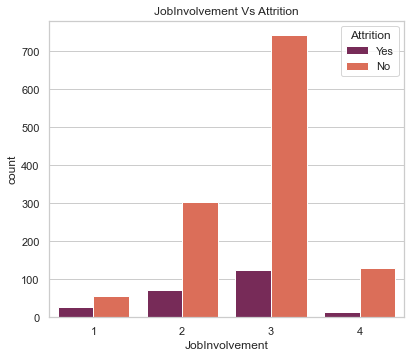

In [25]:
plt.figure(figsize=(14,12))
plt.subplot(221)
plt.title('JobInvolvement Vs Attrition')
sns.countplot(data['JobInvolvement'],hue=data['Attrition'],palette='rocket')

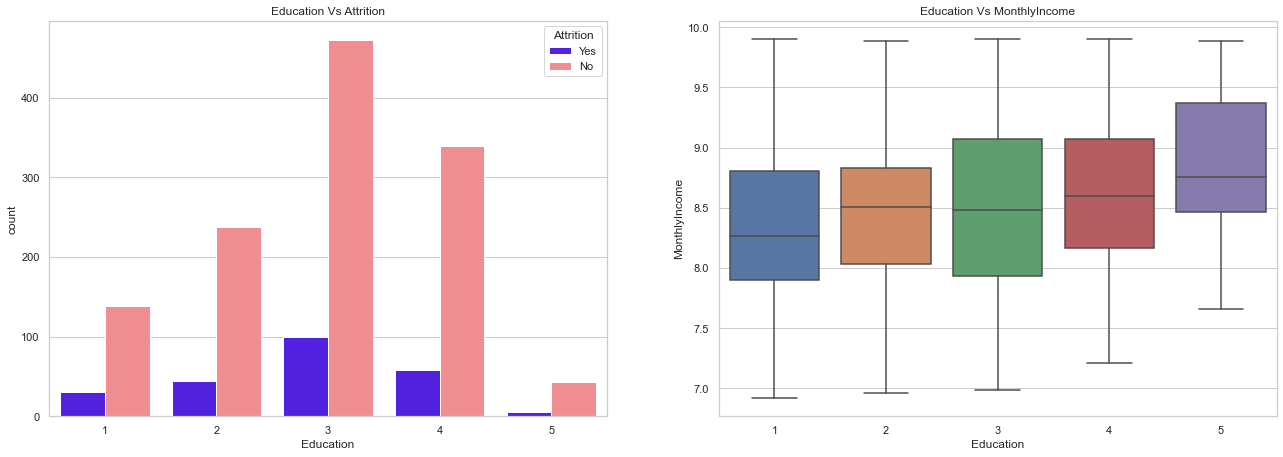

In [26]:
plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('Education Vs Attrition')
sns.countplot(data['Education'],hue=data['Attrition'],palette='gnuplot2')

plt.subplot(222)
plt.title('Education Vs MonthlyIncome')
sns.boxplot(data['Education'],data['MonthlyIncome'])

As the education level increases, monthly incomes also increases and there is a reduction in attrition rate.

Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


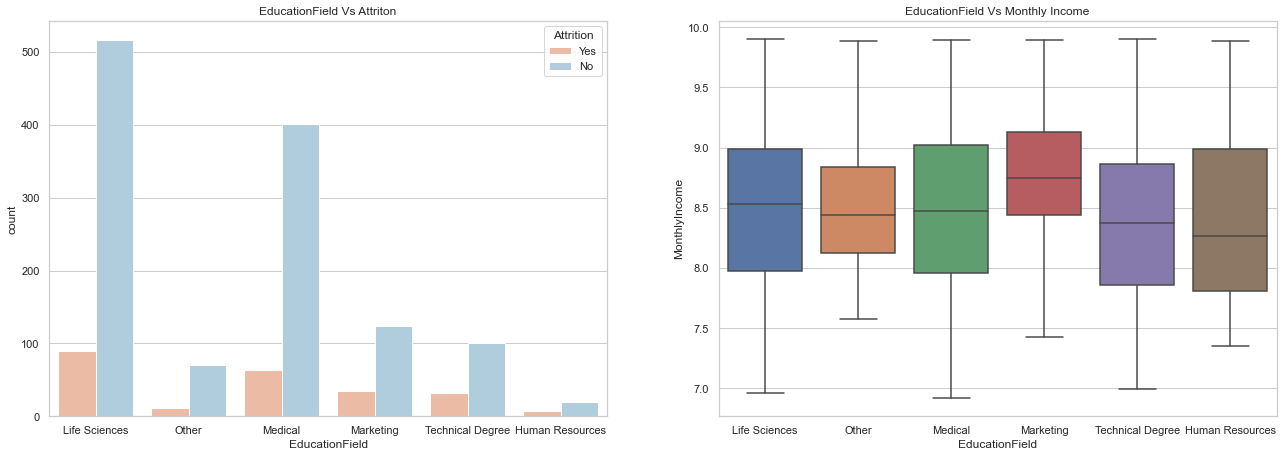

In [27]:
print(pd.crosstab(columns=data['Attrition'],index=data['EducationField']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EducationField Vs Attriton')
sns.countplot(data['EducationField'],hue=data['Attrition'],palette='RdBu')

plt.subplot(222)
plt.title('EducationField Vs Monthly Income')
sns.boxplot(data['EducationField'],data['MonthlyIncome'])

Employees who have Life Science education level have the most attrition number.

Medical education level has the second highest attrition number.

In [28]:
agebins=pd.cut(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60]) 
#Discretisation to understand what age categories to Target

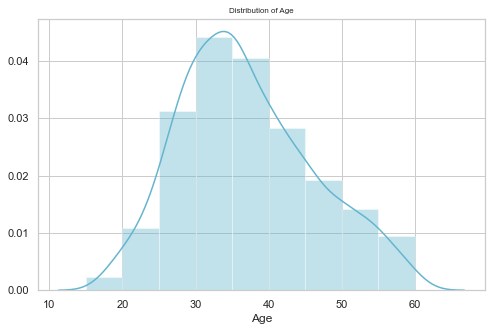

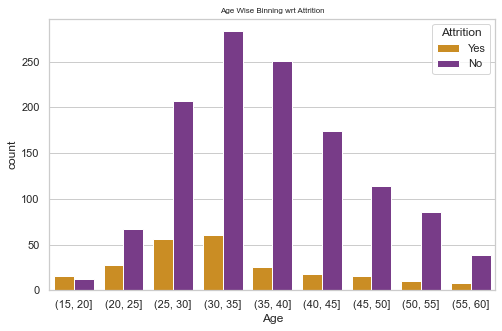

In [29]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Age',size=8)
sns.distplot(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60],color='c')

plt.figure(figsize=(8,5))
plt.title('Age Wise Binning wrt Attrition',size=8)
sns.countplot(agebins,hue='Attrition',data=data,palette='CMRmap_r')

If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups.

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


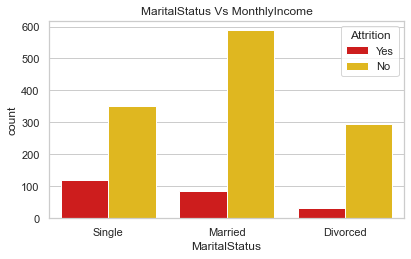

In [30]:
print(pd.crosstab(data['Attrition'],data['MaritalStatus']))

plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.countplot(data['MaritalStatus'],hue=data['Attrition'],palette='hot')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

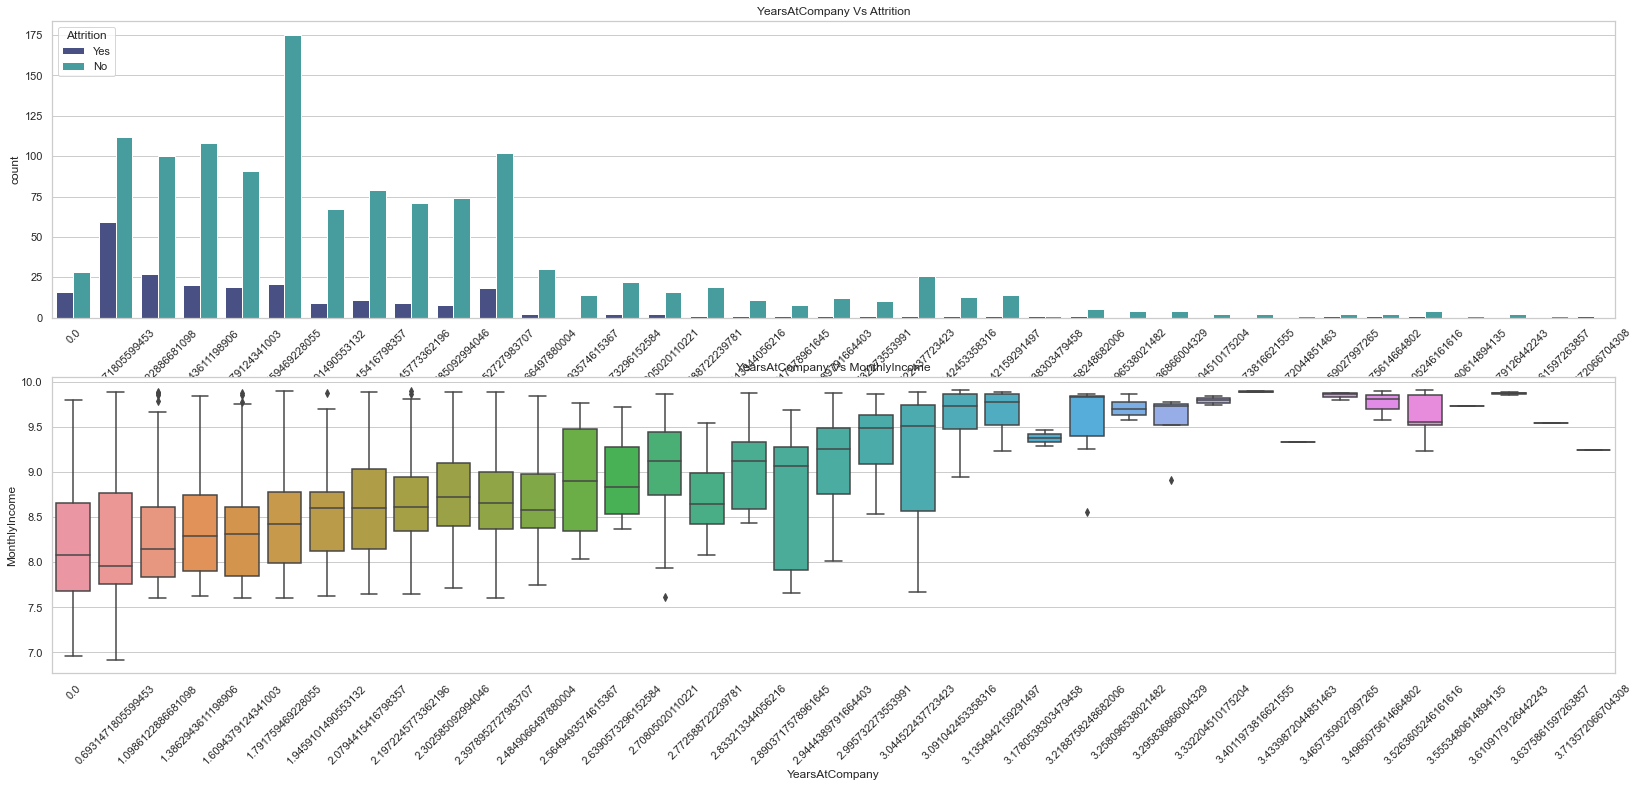

In [31]:
plt.figure(figsize=(28,12))
plt.subplot(211)
plt.title('YearsAtCompany Vs Attrition')
sns.countplot(data['YearsAtCompany'],hue=data['Attrition'],palette='mako')
plt.xticks(rotation=45)

plt.subplot(212)
plt.title('YearsAtCompany Vs MonthlyIncome')
sns.boxplot(data['YearsAtCompany'],data['MonthlyIncome'])
plt.xticks(rotation=45)

Employees who have one year or less working experience in the company have the highest attrition percentage.

In [32]:
df=data.copy()

In [33]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})
# Repalacing as 0 and 1 for model understanding 

In [34]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [35]:
for col in cat_cols:
    freqs = df[col].value_counts()
    k = freqs.index[freqs>20][:-1]  # One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        df[name] = (df[col] == cat).astype(int)
    del df[col]
    print(col)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus


In [36]:
df.shape

(1470, 45)

In [37]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,0.693147,2,2,94.0,3,1.098612,4,8.698514,19479,2.197225,1,11,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,49,0,279,2.197225,1,3,61.0,2,1.098612,2,8.543056,24907,0.693147,0,23,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,7,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,37,1,1373,1.098612,2,4,92.0,2,0.693147,3,8.785692,2396,1.945910,1,15,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
5,33,0,1392,1.386294,4,4,56.0,3,0.693147,3,7.975908,23159,0.693147,1,11,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,27,0,591,1.098612,1,1,40.0,3,0.693147,2,8.151622,16632,2.302585,0,12,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,2,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


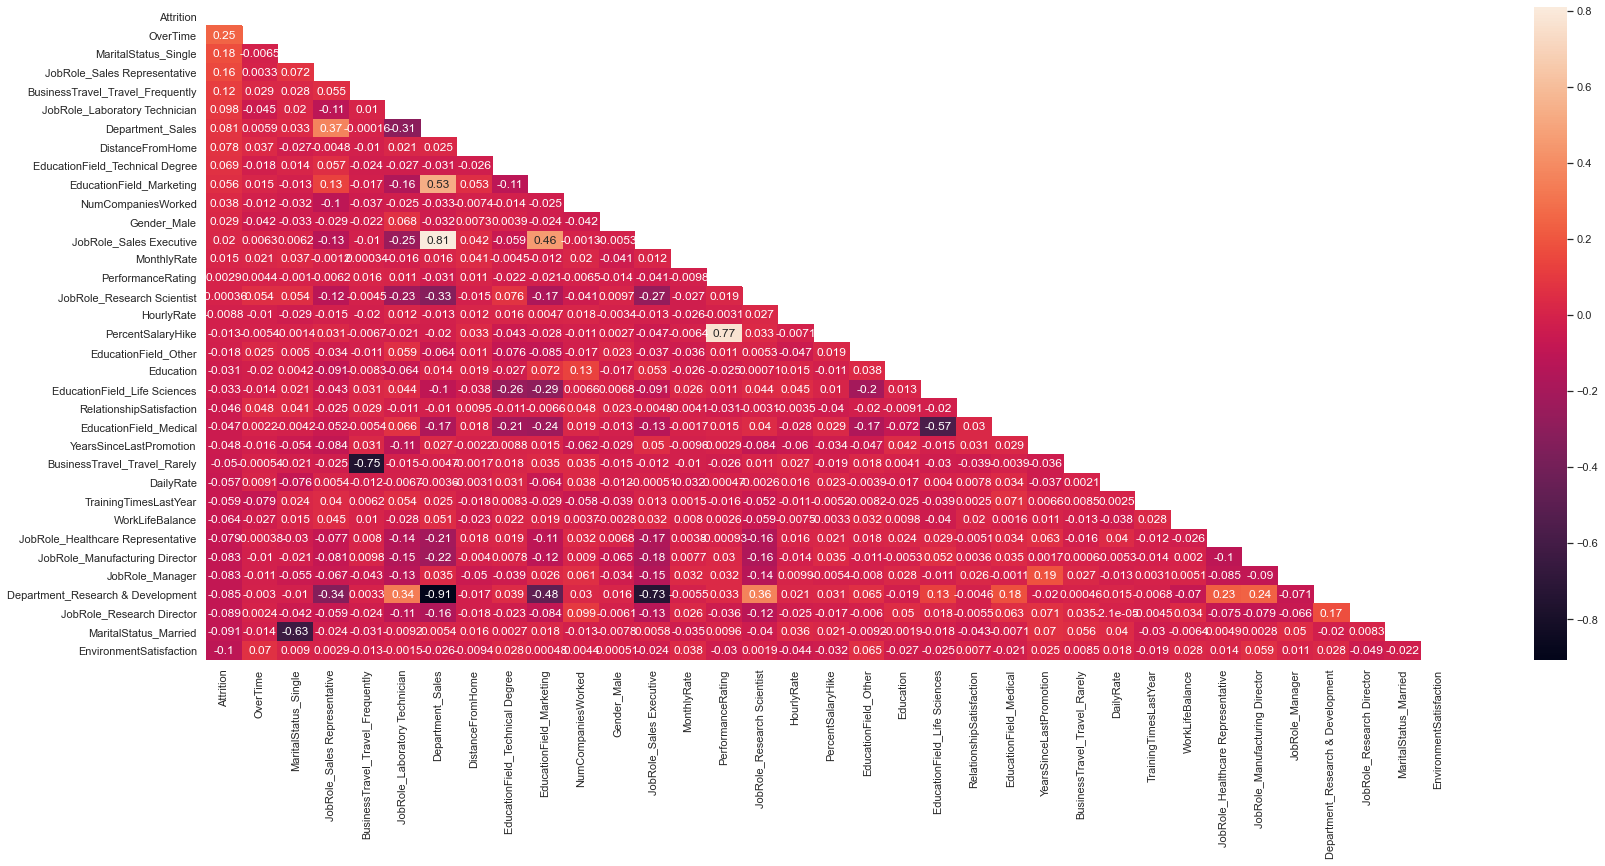

In [40]:
corr=df.corr()
cols=corr.nlargest(35,'Attrition').index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(28,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values, mask = np.triu(cm))

Features which have strong correlations:

Percent Salary Hike and Performance Rating,
Total Working Years, Monthly Income and Job Level,
Years at Company, Years with Current Manager, and Years in Current Role,
Features which have moderate correlations:
Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,
Job Level has moderate correlation with Years at Company and Age,
Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,
Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,
Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years,
Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years,
Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=list(df.columns)
cols.remove('Attrition')
for col in cols:
    df[col]=df[col].astype(float)
    df[[col]]=ss.fit_transform(df[[col]])
df['Attrition']=pd.to_numeric(df['Attrition'],downcast='integer')

In [42]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [43]:
X.shape

(1470, 44)

# MODEL BUILDING

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [54]:
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score
# Importing all the predictive models.

lr = LogisticRegression(fit_intercept=True)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
rfc= RandomForestClassifier()
svm= SVC(probability=True)



We have a imbalanced dataset with majority of observations being of one type ('No' which is '0' in the dataset) in our case. We have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset. To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. We have two approaches to curb such datasets: oversampling, which increase the number of observations corresponding to the minority class, or undersampling which decrease the number of observations for the majority class. Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

In [55]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
sm = SMOTE(random_state = 0)
X_train_sm,  y_train_sm = sm.fit_sample(X_train, y_train)

In [56]:
def model_eval(algo , X_train , y_train , X_test , y_test):
 

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)
    y_train_pred = algo.predict(X_train) # Finding the positives and negatives               
    
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
   
    y_test_pred = algo.predict(X_test)
    
    print('*'*50)
    print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    
    print('*'*50)
   
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_test_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

As the data imbalance is emphasized above, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

# LOGISTIC REGRESSION

In [57]:
model_eval(lr , X_train , y_train , X_test , y_test)

Confusion matrix - Train : 
 [[843  20]
 [ 72  94]]
Overall Accuracy - Train : 0.9105928085519922
AUC - Train: 0.8941699590947801
**************************************************
Confusion matrix - Test : 
 [[350  20]
 [ 45  26]]
Overall Accuracy - Test : 0.8526077097505669
AUC - Test: 0.8078416444613629
**************************************************


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.57      0.37      0.44        71

    accuracy                           0.85       441
   macro avg       0.73      0.66      0.68       441
weighted avg       0.83      0.85      0.84       441

f1 score: 0.8392690409497131


# KNN

In [58]:
model_eval(knn , X_train , y_train , X_test , y_test)

Confusion matrix - Train : 
 [[856   7]
 [112  54]]
Overall Accuracy - Train : 0.8843537414965986
AUC - Train: 0.9255085230842257
**************************************************
Confusion matrix - Test : 
 [[359  11]
 [ 61  10]]
Overall Accuracy - Test : 0.8367346938775511
AUC - Test: 0.6283593452607537
**************************************************


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.48      0.14      0.22        71

    accuracy                           0.84       441
   macro avg       0.67      0.56      0.56       441
weighted avg       0.79      0.84      0.80       441

f1 score: 0.797535745173138


# DECISION TREE

In [59]:
model_eval(dtc , X_train , y_train , X_test , y_test)

Confusion matrix - Train : 
 [[834  29]
 [132  34]]
Overall Accuracy - Train : 0.8435374149659864
AUC - Train: 0.7059570844211144
**************************************************
Confusion matrix - Test : 
 [[352  18]
 [ 60  11]]
Overall Accuracy - Test : 0.8231292517006803
AUC - Test: 0.673886562618957
**************************************************


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       370
           1       0.38      0.15      0.22        71

    accuracy                           0.82       441
   macro avg       0.62      0.55      0.56       441
weighted avg       0.78      0.82      0.79       441

f1 score: 0.7907361205351706


# Random Forest

In [60]:
#Using Randomised Search Cross Validation to Search for the best parameters
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(50 , 200) , 
           'max_features' : sp_randint(1,26) ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_split' : sp_randint(2,10) ,
           'min_samples_leaf' : sp_randint(1,10) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002501A60B8B0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002501A60B040>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002501A60BA30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002501A60B1F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002501A4B7E50>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [61]:
rsearch_rfc.best_params_    

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 117}

In [62]:
rfc= RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)

rfc.fit(X_train,y_train)

y_train_pred=rfc.predict(X_train)                  
y_train_prob=rfc.predict_proba(X_train)[:,1]      
print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))
global score
# Assign f1 score to a variable
score = f1_score(y_test, y_test_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

Confusion Matrix - Train: 
 [[863   0]
 [ 55 111]]
Overall Accuracy - Train: 0.9465500485908649
AUC- Train 0.9996998422426671
Confusion Matrix - Test: 
 [[367   3]
 [ 64   7]]
Overall Accuracy - Test: 0.8480725623582767
AUC- Test 0.7575561476969928
f1 score: 0.7966503196275505


In [63]:
col_sorted_by_importance=rfc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rfc.feature_importances_[col_sorted_by_importance]
})

feat_imp.sort_values(by='imps',ascending=False)[:10]


,cols,imps
43,MonthlyIncome,0.074279
42,Age,0.061929
41,DailyRate,0.060337
40,TotalWorkingYears,0.057828
39,OverTime,0.055467
38,MonthlyRate,0.046672
37,HourlyRate,0.044141
36,YearsAtCompany,0.043802
35,DistanceFromHome,0.043157
34,YearsWithCurrManager,0.038044


# SUPPORT VECTOR MACHINE

In [64]:
model_eval(svm, X_train , y_train , X_test , y_test)

Confusion matrix - Train : 
 [[862   1]
 [ 69  97]]
Overall Accuracy - Train : 0.9319727891156463
AUC - Train: 0.9697050077482583
**************************************************
Confusion matrix - Test : 
 [[365   5]
 [ 58  13]]
Overall Accuracy - Test : 0.8571428571428571
AUC - Test: 0.7906357061286639
**************************************************


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.72      0.18      0.29        71

    accuracy                           0.86       441
   macro avg       0.79      0.58      0.61       441
weighted avg       0.84      0.86      0.82       441

f1 score: 0.8193806561830139


# Linear Support Vector Machine

In [76]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
lsvc.fit(X_train,y_train)
y_train_pred=lsvc.predict(X_train)                

print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train

y_test_pred=lsvc.predict(X_test)
print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test

global score
# Assign f1 score to a variable
score = f1_score(y_test, y_test_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))



Confusion Matrix - Train: 
 [[845  18]
 [ 78  88]]
Overall Accuracy - Train: 0.9067055393586005


Confusion Matrix - Test: 
 [[354  16]
 [ 47  24]]
Overall Accuracy - Test: 0.8571428571428571
f1 score: 0.8400663031013226


# KERNELIZED SUPPORT VECTOR MACHINE

In [65]:
from sklearn.svm import SVC
svm=SVC(probability=True)

kernel=['linear','poly','rbf','sigmoid']

for i in kernel:
    svm=SVC(kernel=i,C=1.0)
    svm.fit(X_train,y_train)
    print('For kernel i,',i)
    print('accuracy is' ,svm.score(X_test,y_test))

For kernel i, linear
accuracy is 0.8775510204081632
For kernel i, poly
accuracy is 0.8594104308390023
For kernel i, rbf
accuracy is 0.8571428571428571
For kernel i, sigmoid
accuracy is 0.854875283446712


In [66]:
from sklearn.model_selection import GridSearchCV 
svm=SVC(probability=True,class_weight='balanced',random_state=3)
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'coef0':[0.001,10,0.5],
              'kernel': ['rbf','poly', 'sigmoid']}  
  
grid_search_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.161, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.1s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.1s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.845, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.888, total=   0.1s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=sigmoid ..

[CV]  C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.835, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.161, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.835, total=   0.3s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.161, total=   0.3s
[CV] C=0.1, coe

[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.3s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, coef0=10, gamma=0.001, kernel=rbf, score=0.587, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, coef0=10, gamma=0.001, kernel=rbf, score=0.587, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.001,

[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.869, total=   0.1s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.1s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.893, total=   0.1s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.583, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.641, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.617, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.646, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, ker

[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.2s
[CV] C=1, coef0=0.001, gamma=1, kernel=rbf ...........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.2s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.1s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.1s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.1s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.845, total=   0.1s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.888, total=   0.1s
[CV] C=1, coef0=0.001, gamma=1, kernel=sigmoid ..................

[CV]  C=1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.785, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.714, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.660, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.718, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.743, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.615, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=poly .....................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=poly, score=0.160, total=   0.2s
[CV] C=1, coef0=0.001, gamma=0.

[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.2s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.2s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, coef0=10, gamma=0.001, kernel=rbf, score=0.762, total=   0.1s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, coef0=10, gamma=0.001, kernel=rbf, score=0.777, total=   0.2s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, coef0=10, gamma=0.001, kernel=rbf, score=0.752, total=   0.1s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf .......

[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=poly ..........................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.893, total=   0.1s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.539, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.621, total=   0.1s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.578, total=   0.1s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.621, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.600, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.01, kernel=rbf ....

[CV]  C=10, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.1s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.1s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.1s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.845, total=   0.1s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.888, total=   0.1s
[CV] C=10, coef0=0.001, gamma=1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.001, gamma=1, kernel=sigmoid, score=0.597, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=sigmoid ......

[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.3s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.3s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.2s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.2s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf .........................
[CV]  C=10, coef0=10, gamma=0.001, kernel=rbf, score=0.791, total=   0.1s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf .........................
[CV]  C=10, coef0=10, gamma=0.001, kernel=rbf, score=0.791, total=   0.1s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf .........................
[CV]  C=10, coef0=10, gamma=0.001, kernel=rbf, score=0.801, total=   0.1s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf

[CV]  C=10, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.1s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=poly .........................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=poly, score=0.893, total=   0.1s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.534, total=   0.1s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.607, total=   0.1s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.573, total=   0.1s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.621, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.605, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.01, kernel=

[CV]  C=100, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.3s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.1s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.845, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.888, total=   0.1s
[CV] C=100, coef0=0.001, gamma=1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.001, gamma=1, kernel=sigmoid, score=0.587, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=sigmoi

[CV]  C=100, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.834, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.772, total=   0.1s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.796, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.777, total=   0.1s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.791, total=   0.1s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.829, total=   0.1s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=poly ...................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=poly, score=0.160, total=   0.1s
[CV] C=100, coef0

[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.3s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.2s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.3s
[CV] C=100, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=100, coef0=10, gamma=0.001, kernel=rbf, score=0.825, total=   0.1s
[CV] C=100, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=100, coef0=10, gamma=0.001, kernel=rbf, score=0.825, total=   0.2s
[CV] C=100, coef0=10, gamma=0.001,

[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.869, total=   0.1s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.893, total=   0.1s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.529, total=   0.1s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.607, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.655, total=   0.1s
[CV] C=100, coef0=0.5, gamma=0.1, kernel

[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=rbf ........................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=rbf ........................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.3s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.845, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=pol

[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.782, total=   0.4s
[CV] C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid ................
[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.801, total=   0.5s
[CV] C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid ................
[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.844, total=   0.5s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.786, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.816, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.782, total=   0.1s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.816, total=   0.2s
[CV] 

[CV]  C=1000, coef0=10, gamma=0.01, kernel=poly, score=0.816, total=   0.4s
[CV] C=1000, coef0=10, gamma=0.01, kernel=poly .......................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=poly, score=0.859, total=   0.6s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.3s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.3s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.2s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.2s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.2s
[CV] C=1000, coef0=10, gamm

[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=rbf, score=0.839, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.1s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.1s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.869, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.1s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.893, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=sigmoid ....................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.534, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kerne

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  4.6min finished


GridSearchCV(estimator=SVC(class_weight='balanced', probability=True,
                           random_state=3),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'coef0': [0.001, 10, 0.5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [67]:
svm= SVC(probability=True,**grid_search_svm.best_params_,random_state=3)

svm.fit(X_train,y_train)

y_train_pred=svm.predict(X_train)                
y_train_prob=svm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column
print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))
y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict_proba(X_test)[:,1]
print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))
global score
# Assign f1 score to a variable
score = f1_score(y_test, y_test_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

Confusion Matrix - Train: 
 [[863   0]
 [ 69  97]]
Overall Accuracy - Train: 0.9329446064139941
AUC- Train 0.9939898644403803


Confusion Matrix - Test: 
 [[367   3]
 [ 59  12]]
Overall Accuracy - Test: 0.8594104308390023
AUC- Test 0.7393033878949372
f1 score: 0.8185824444693541


# RIDGE CLASSIFIER

In [68]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8306, solver='auto',
                tol=0.001)
rc.fit(X_train,y_train)
y_train_pred=svm.predict(X_train)                
y_train_prob=svm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column
print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))
y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict_proba(X_test)[:,1]
print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))
global score
# Assign f1 score to a variable
score = f1_score(y_test, y_test_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

RidgeClassifier()
Confusion Matrix - Train: 
 [[863   0]
 [ 69  97]]
Overall Accuracy - Train: 0.9329446064139941
AUC- Train 0.9939898644403803


Confusion Matrix - Test: 
 [[367   3]
 [ 59  12]]
Overall Accuracy - Test: 0.8594104308390023
AUC- Test 0.7393033878949372
f1 score: 0.8185824444693541


# BEST MODEL-Linear Support Vector Machine

In [77]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(verbose=0)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
lsvc.fit(X_train,y_train)
y_train_pred=lsvc.predict(X_train)                

print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train

y_test_pred=lsvc.predict(X_test)
print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test

print(y_test_pred)
global score
# Assign f1 score to a variable
score = f1_score(y_test, y_test_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))



Confusion Matrix - Train: 
 [[845  18]
 [ 78  88]]
Overall Accuracy - Train: 0.9067055393586005


Confusion Matrix - Test: 
 [[354  16]
 [ 47  24]]
Overall Accuracy - Test: 0.8571428571428571
[0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0

As previously mentioned,the data is imbalanced because of which the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. f1 score and accuracy both are used to compare and evaluate the best model, in this case it is linear support vector machine.